## Observations and Insights 

In [105]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [106]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].nunique()
mouse_count

249

In [107]:
#Finding the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_rows = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [108]:
#(optional) Get all data for duplicate Mouse ID
all_duplicate_rows = combined_df.loc[combined_df['Mouse ID'] == 'g989']
all_duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [110]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby functiongroupby_df = clean_df.groupby(["Drug Regimen"])
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

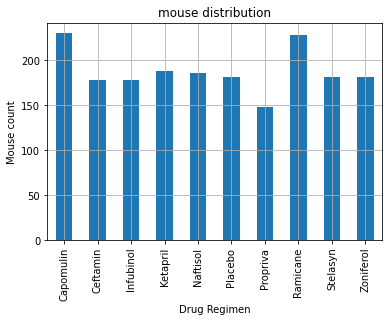

<Figure size 432x288 with 0 Axes>

In [113]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_distribution = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
mice_distribution
distribution_chart = mice_distribution.plot(kind='bar')
distribution_chart.set_xlabel('Drug Regimen')
distribution_chart.set_ylabel('Mouse count')
plt.title('mouse distribution')
plt.grid()
plt.show()
plt.tight_layout()

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


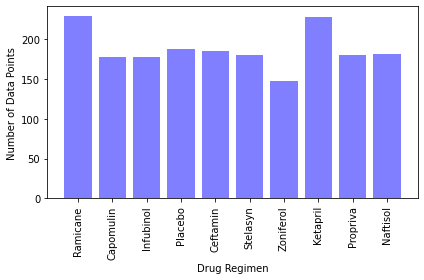

In [114]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
keys = clean_df['Drug Regimen'].unique()
print(keys)
#print(len(keys))
x_axis = np.arange(len(keys))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mice_distribution, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, keys, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


plt.tight_layout()
plt.savefig("pyplot-bar.png")
plt.show()

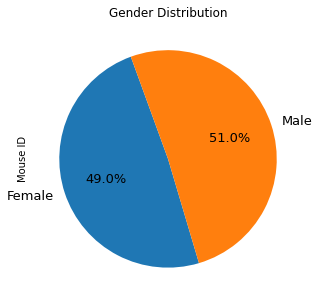

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby('Sex')['Mouse ID'].count()
gender
gender_chart = gender.plot(kind="pie", y='Mouse ID',title=("Gender Distribution"),legend=False,autopct='%1.1f%%', 
 startangle=110, shadow=False, fontsize=13, figsize=(8,5))



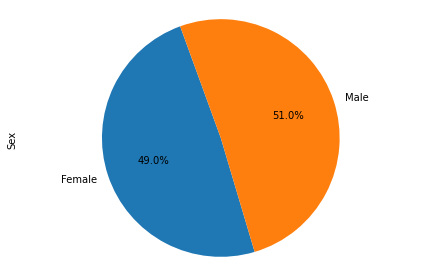

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
 

# Labels for the sections of our pie chart
labels = gender.keys()

# Generate the pie plot using pyplot
plt.pie(gender, labels=labels, autopct="%1.1f%%", startangle=110)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Set y axis label
plt.ylabel("Sex")

# Save and Display the pie plot
plt.tight_layout()
plt.savefig("pyplot-pie.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_timepoints = clean_df.groupby("Mouse ID")["Timepoint"].max()
new_merged_df = pd.merge(clean_df, last_timepoints,on=("Mouse ID","Timepoint"), how="inner")
last_timepoints
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
new_merged_df
#drug_df = new_merged_df.loc[new_merged_df["Drug Regimen"] == treatments ]
#drug_df["Mouse ID"]["Timepoint"].max()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [149]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting) this contains data for each mouse in each treatment regime
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = new_merged_df.loc[(new_merged_df["Drug Regimen"] == treatment)]["Tumor Volume (mm3)"]
        
    
    # add subset 
    tumor_vol_data.append( tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(outliers)
    print(tumor_vol_data.index)

Series([], Name: Tumor Volume (mm3), dtype: float64)
<built-in method index of list object at 0x0000027C688FBB80>
Series([], Name: Tumor Volume (mm3), dtype: float64)
<built-in method index of list object at 0x0000027C688FBB80>
74    36.321346
Name: Tumor Volume (mm3), dtype: float64
<built-in method index of list object at 0x0000027C688FBB80>
Series([], Name: Tumor Volume (mm3), dtype: float64)
<built-in method index of list object at 0x0000027C688FBB80>


Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [178]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


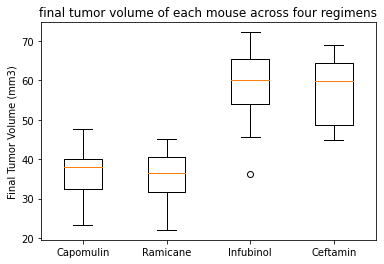

In [183]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("final tumor volume of each mouse across four regimens")
ax1.set_ylabel("tumor volume")
ax1.boxplot(tumor_vol_data, labels = treatments)

plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

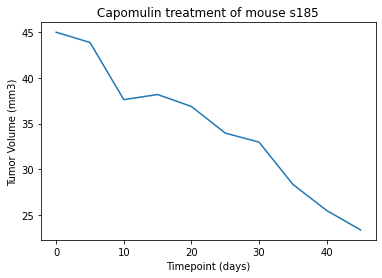

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


In [152]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
new_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
mouse_id = "s185"
mouse_df = new_df.loc[new_df["Mouse ID"] == "s185"]
new_mouse_df = mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
plt.plot(new_mouse_df["Timepoint"], new_mouse_df["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
new_mouse_df
#mouse_df["Timepoint", "Tumor Volume (mm3)"]

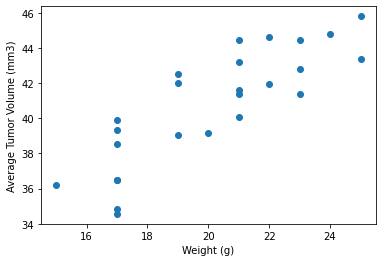

In [153]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
new_df = new_df.groupby(["Weight (g)","Mouse ID"])["Tumor Volume (mm3)"].mean()
new_df = new_df.reset_index()

plt.scatter(new_df["Weight (g)"],new_df["Tumor Volume (mm3)"])


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()




## Correlation and Regression

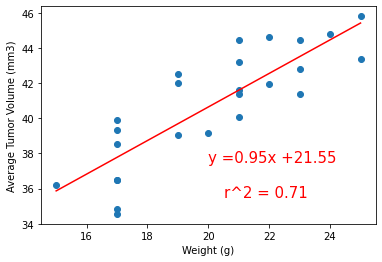

In [154]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_value = new_df["Weight (g)"]
y_value = new_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
equation = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"
plt.scatter(new_df["Weight (g)"],new_df["Tumor Volume (mm3)"])
plt.plot(x_value, regress_value, "r-")
plt.annotate(equation,(20,37.5), fontsize=15, color="red")
plt.annotate(r_squared, (20.5,35.5),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()